# 1. Get all folder name and details.

In [1]:
# Main
import os 
cur_path=os.getcwd()
print(cur_path)
File_dir_path=cur_path
file_dir=os.listdir(path=File_dir_path)
print(f"All files : {file_dir}")
csv_files=[i for i in file_dir if str(i).endswith(".csv") and " Copy" not in str(i)]
print(f"csv_files : {csv_files}")
exl_files=[i for i in file_dir if str(i).endswith(".xlsx") and " Copy" not in str(i)]
print(f"Excel_files : {exl_files}")

c:\Users\KIIT\Desktop\GitHUB\CollegeProjects\InHouse Projects\ML-DL_SelfProjects\ML Model Build Automation
All files : ['.gitkeep', 'AutoModelBuilding.ipynb', 'Duplicate Copies', 'Employee_attrition.csv', 'Income&Expenditure.csv', 'Income&Expenditure.xlsx']
csv_files : ['Employee_attrition.csv', 'Income&Expenditure.csv']
Excel_files : ['Income&Expenditure.xlsx']


# 2. Read excel and convert to csv

In [2]:
#Main
import pandas as pd
d=dict()
for i in exl_files:
    exl_data=pd.read_excel(i)
    exl_data.to_csv(i[:-5]+".csv")
    d.update({i[:-5]+".csv":True})
file_dir=os.listdir(path=File_dir_path)

print(File_dir_path)
print(file_dir)



c:\Users\KIIT\Desktop\GitHUB\CollegeProjects\InHouse Projects\ML-DL_SelfProjects\ML Model Build Automation
['.gitkeep', 'AutoModelBuilding.ipynb', 'Duplicate Copies', 'Employee_attrition.csv', 'Income&Expenditure.csv', 'Income&Expenditure.xlsx']


In [3]:
for i in range(len(csv_files)):
    print(f"Press {i+1} for selecting {csv_files[i]}")
print(f"User Choise : ",end="")
ch=1 #int(input("User Choice : "))
print(ch)
def f():
    if csv_files[ch-1] in d.keys():
        data=pd.read_csv(csv_files[ch-1]).iloc[:,2:]
    else:
        data=pd.read_csv(csv_files[ch-1]).iloc[:,1:]
    return data

Press 1 for selecting Employee_attrition.csv
Press 2 for selecting Income&Expenditure.csv
User Choise : 1


In [4]:
data=f()
data.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Number of Dependents Job Level Company Size  Company Tenure  \
0       No  ...                     0       Mid       Medium              89   
1       No  ...                     3       Mid       Medium              21   
2       No  ...                     3       Mid       Medium              74   
3       No  ...                     2       Mid        Small              50   
4      Yes  ...                     0    Senior       Medium              68   

  Remote Work Leadership Opportunities  Innovation Opportunities  \
0          No                       No                        No   
1          No                       No                        No   
2          No                       No                        No   
3         Yes                       No                        No   
4          No                       No                        No   

  Company Reputation Employee Recognition Attrition  
0          Excellent               Medium    Stayed  
1               Fair                  Low    Stayed  
2               Poor                  Low    Stayed  
3               Good               Medium    Stayed  
4               Fair               Medium    Stayed  

[5 rows x 23 columns]

# 3. Decalare ML Model 

In [5]:
Reg_model_flag=None
if len(data.iloc[:,-1].unique())>2:
    print("Regression model to be applied")
    Reg_model_flag="regression"

elif len(data.iloc[:,-1].unique())==2:
    print("Classification model to be applied")
    Reg_model_flag="classification"
    
else:
    pass

Classification model to be applied


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   
model_linearRegression=LinearRegression()
model_SVRegression=SVR()
model_DTRegression=DecisionTreeRegressor()
model_RFRegression=RandomForestRegressor()
model_regression={"Linear Regression":model_linearRegression,
                  "SVM Regression":model_SVRegression,
                  "DecisionTree Regression":model_DTRegression,
                  "Randomforest Regression":model_RFRegression}

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model_logsClassify=LogisticRegression()
model_SVClassify=SVC()
model_DTClassify=DecisionTreeClassifier()
model_RFClassify=RandomForestClassifier()
model_Classify={"Logistic Regression":model_logsClassify,
                "SVM Classification":model_SVClassify,
                "DecisionTree Classification":model_DTClassify,
                "Randomforest Classification":model_RFClassify}

In [7]:
for model_name,model in model_regression.items():
    print(model_name,end=" : ")
    print(model)
print()
for model_name,model in model_Classify.items():
    print(model_name,end=" : ")
    print(model)

Linear Regression : LinearRegression()
SVM Regression : SVR()
DecisionTree Regression : DecisionTreeRegressor()
Randomforest Regression : RandomForestRegressor()

Logistic Regression : LogisticRegression()
SVM Classification : SVC()
DecisionTree Classification : DecisionTreeClassifier()
Randomforest Classification : RandomForestClassifier()


# EDA(Explanatory Data Analysis)

In [8]:
data.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

# Data Cleaning - Outliers, Null values

In [9]:
data.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       59598 non-null  int64 
 1   Gender                    59598 non-null  object
 2   Years at Company          59598 non-null  int64 
 3   Job Role                  59598 non-null  object
 4   Monthly Income            59598 non-null  int64 
 5   Work-Life Balance         59598 non-null  object
 6   Job Satisfaction          59598 non-null  object
 7   Performance Rating        59598 non-null  object
 8   Number of Promotions      59598 non-null  int64 
 9   Overtime                  59598 non-null  object
 10  Distance from Home        59598 non-null  int64 
 11  Education Level           59598 non-null  object
 12  Marital Status            59598 non-null  object
 13  Number of Dependents      59598 non-null  int64 
 14  Job Level             

In [11]:
if "Date" in data.columns:
    data.set_index("Date",inplace=True)
data

Age  Gender  Years at Company    Job Role  Monthly Income  \
0       31    Male                19   Education            5390   
1       59  Female                 4       Media            5534   
2       24  Female                10  Healthcare            8159   
3       36  Female                 7   Education            3989   
4       56    Male                41   Education            4821   
...    ...     ...               ...         ...             ...   
59593   50  Female                12   Education            4414   
59594   18    Male                 4  Healthcare            8040   
59595   22  Female                14  Technology            7944   
59596   23    Male                 8   Education            2931   
59597   56    Male                19  Technology            6660   

      Work-Life Balance Job Satisfaction Performance Rating  \
0             Excellent           Medium            Average   
1                  Poor             High                Low   
2                  Good             High                Low   
3                  Good             High               High   
4                  Fair        Very High            Average   
...                 ...              ...                ...   
59593              Fair             High            Average   
59594              Fair             High               High   
59595              Fair             High               High   
59596              Fair        Very High            Average   
59597              Good             High            Average   

       Number of Promotions Overtime  ...  Number of Dependents Job Level  \
0                         2       No  ...                     0       Mid   
1                         3       No  ...                     3       Mid   
2                         0       No  ...                     3       Mid   
3                         1       No  ...                     2       Mid   
4                         0      Yes  ...                     0    Senior   
...                     ...      ...  ...                   ...       ...   
59593                     1      Yes  ...                     2    Senior   
59594                     3       No  ...                     0    Senior   
59595                     0      Yes  ...                     2     Entry   
59596                     0       No  ...                     0     Entry   
59597                     0      Yes  ...                     3       Mid   

      Company Size  Company Tenure Remote Work Leadership Opportunities  \
0           Medium              89          No                       No   
1           Medium              21          No                       No   
2           Medium              74          No                       No   
3            Small              50         Yes                       No   
4           Medium              68          No                       No   
...            ...             ...         ...                      ...   
59593        Small              35          No                       No   
59594       Medium              73          No                       No   
59595        Small              29          No                      Yes   
59596        Large               9          No                       No   
59597       Medium              81          No                       No   

       Innovation Opportunities Company Reputation Employee Recognition  \
0                            No          Excellent               Medium   
1                            No               Fair                  Low   
2                            No               Poor                  Low   
3                            No               Good               Medium   
4                            No               Fair               Medium   
...                         ...                ...                  ...   
59593                       Yes               Poor            Very High   
59594  

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj_col=list(data.columns[data.dtypes=="object"])#[1:]
print(obj_col)
for i in obj_col:
    data[i]=le.fit_transform(data[i])
    #
    #if data[i].dtype=="int32":
    #    data[i].astype("int64")
    #
data

['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


Age  Gender  Years at Company  Job Role  Monthly Income  \
0       31       1                19         0            5390   
1       59       0                 4         3            5534   
2       24       0                10         2            8159   
3       36       0                 7         0            3989   
4       56       1                41         0            4821   
...    ...     ...               ...       ...             ...   
59593   50       0                12         0            4414   
59594   18       1                 4         2            8040   
59595   22       0                14         4            7944   
59596   23       1                 8         0            2931   
59597   56       1                19         4            6660   

       Work-Life Balance  Job Satisfaction  Performance Rating  \
0                      0                 2                   0   
1                      3                 0                   3   
2                      2                 0                   3   
3                      2                 0                   2   
4                      1                 3                   0   
...                  ...               ...                 ...   
59593                  1                 0                   0   
59594                  1                 0                   2   
59595                  1                 0                   2   
59596                  1                 3                   0   
59597                  2                 0                   0   

       Number of Promotions  Overtime  ...  Number of Dependents  Job Level  \
0                         2         0  ...                     0          1   
1                         3         0  ...                     3          1   
2                         0         0  ...                     3          1   
3                         1         0  ...                     2          1   
4                         0         1  ...                     0          2   
...                     ...       ...  ...                   ...        ...   
59593                     1         1  ...                     2          2   
59594                     3         0  ...                     0          2   
59595                     0         1  ...                     2          0   
59596                     0         0  ...                     0          0   
59597                     0         1  ...                     3          1   

       Company Size  Company Tenure  Remote Work  Leadership Opportunities  \
0                 1              89            0                         0   
1                 1              21            0                         0   
2                 1              74            0                         0   
3                 2              50            1                         0   
4                 1              68            0                         0   
...             ...             ...          ...                       ...   
59593             2              35            0                         0   
59594             1              73            0                         0   
59595             2              29            0                         1   
59596             0               9            0                         0   
59597             1              81            0                         0   

       Innovation Opportunities  Company Reputation  Employee Recognition  \
0                             0                   0                     2   
1                             0                   1                     1   
2                             0                   3                     1   
3                             0                   2                     2   
4                             0                   1                     2   
...                         ...                 ...                   ...

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       59598 non-null  int64
 1   Gender                    59598 non-null  int32
 2   Years at Company          59598 non-null  int64
 3   Job Role                  59598 non-null  int32
 4   Monthly Income            59598 non-null  int64
 5   Work-Life Balance         59598 non-null  int32
 6   Job Satisfaction          59598 non-null  int32
 7   Performance Rating        59598 non-null  int32
 8   Number of Promotions      59598 non-null  int64
 9   Overtime                  59598 non-null  int32
 10  Distance from Home        59598 non-null  int64
 11  Education Level           59598 non-null  int32
 12  Marital Status            59598 non-null  int32
 13  Number of Dependents      59598 non-null  int64
 14  Job Level                 59598 non-nu

# Handling Outliers

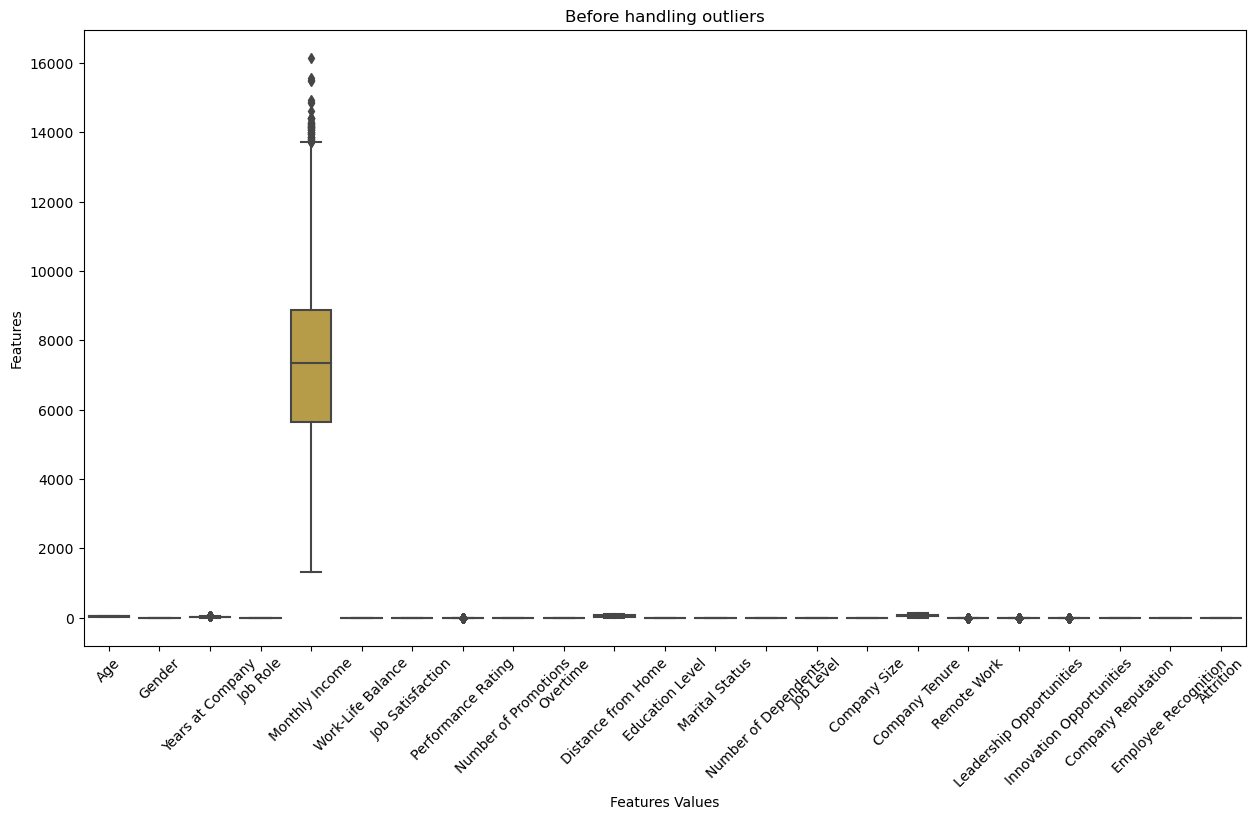

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15,8])
sns.boxplot(data)
plt.title("Before handling outliers")
plt.xticks(rotation=45)
plt.xlabel("Features Values")
plt.ylabel("Features")
plt.savefig(r"C:\Users\KIIT\Desktop\Research Paper\1. Required Documents for Submission\O1.png")
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       59598 non-null  int64
 1   Gender                    59598 non-null  int32
 2   Years at Company          59598 non-null  int64
 3   Job Role                  59598 non-null  int32
 4   Monthly Income            59598 non-null  int64
 5   Work-Life Balance         59598 non-null  int32
 6   Job Satisfaction          59598 non-null  int32
 7   Performance Rating        59598 non-null  int32
 8   Number of Promotions      59598 non-null  int64
 9   Overtime                  59598 non-null  int32
 10  Distance from Home        59598 non-null  int64
 11  Education Level           59598 non-null  int32
 12  Marital Status            59598 non-null  int32
 13  Number of Dependents      59598 non-null  int64
 14  Job Level                 59598 non-nu

['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


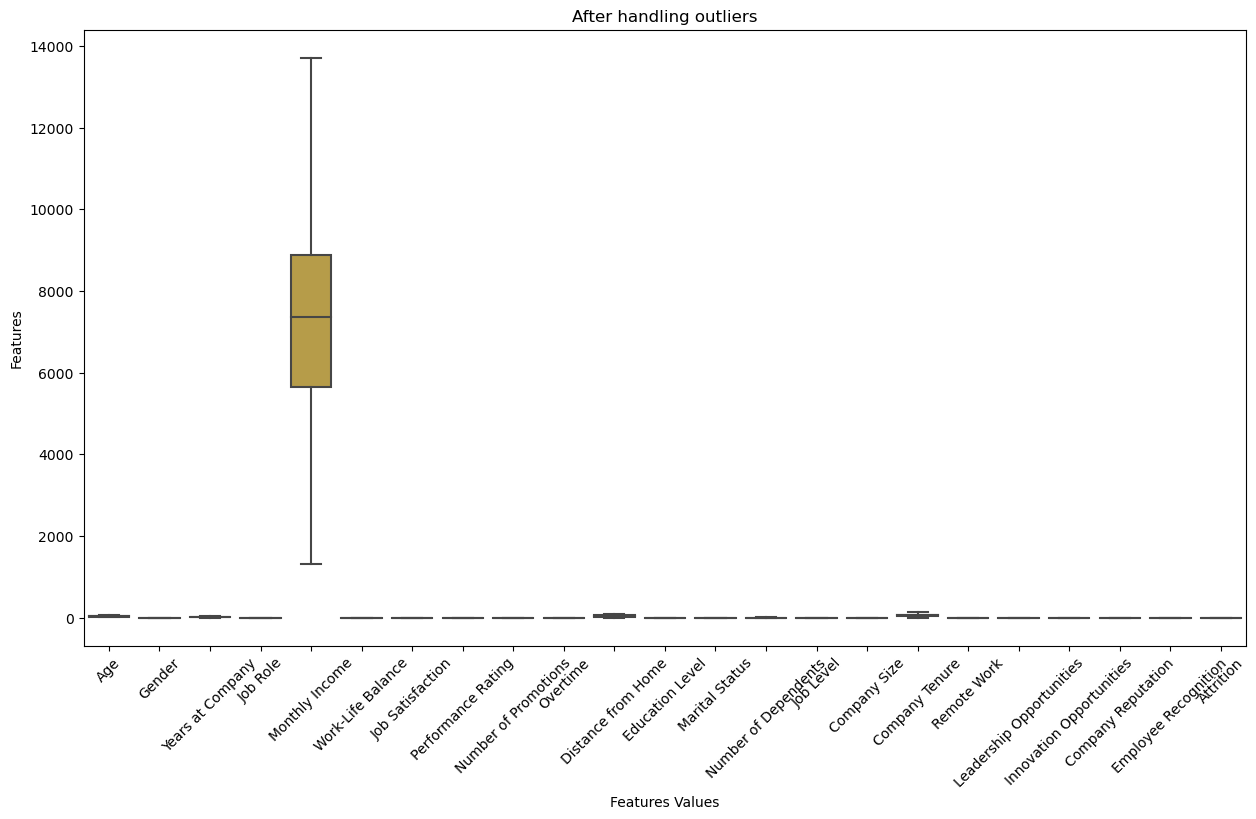

In [16]:
def outlier(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1

    lb=q1-(IQR*1.5)
    ub=q3+(IQR*1.5)

    data.loc[data[i]<lb,i]=lb
    data.loc[data[i]>ub,i]=ub
print(list(data.columns))
for i in list(data.columns):
    if len(data[i].unique())!=1:
        outlier(i)
plt.figure(figsize=[15,8])
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title("After handling outliers")
plt.xlabel("Features Values")
plt.ylabel("Features")
plt.savefig(r"C:\Users\KIIT\Desktop\Research Paper\1. Required Documents for Submission\O2.png")
plt.show()

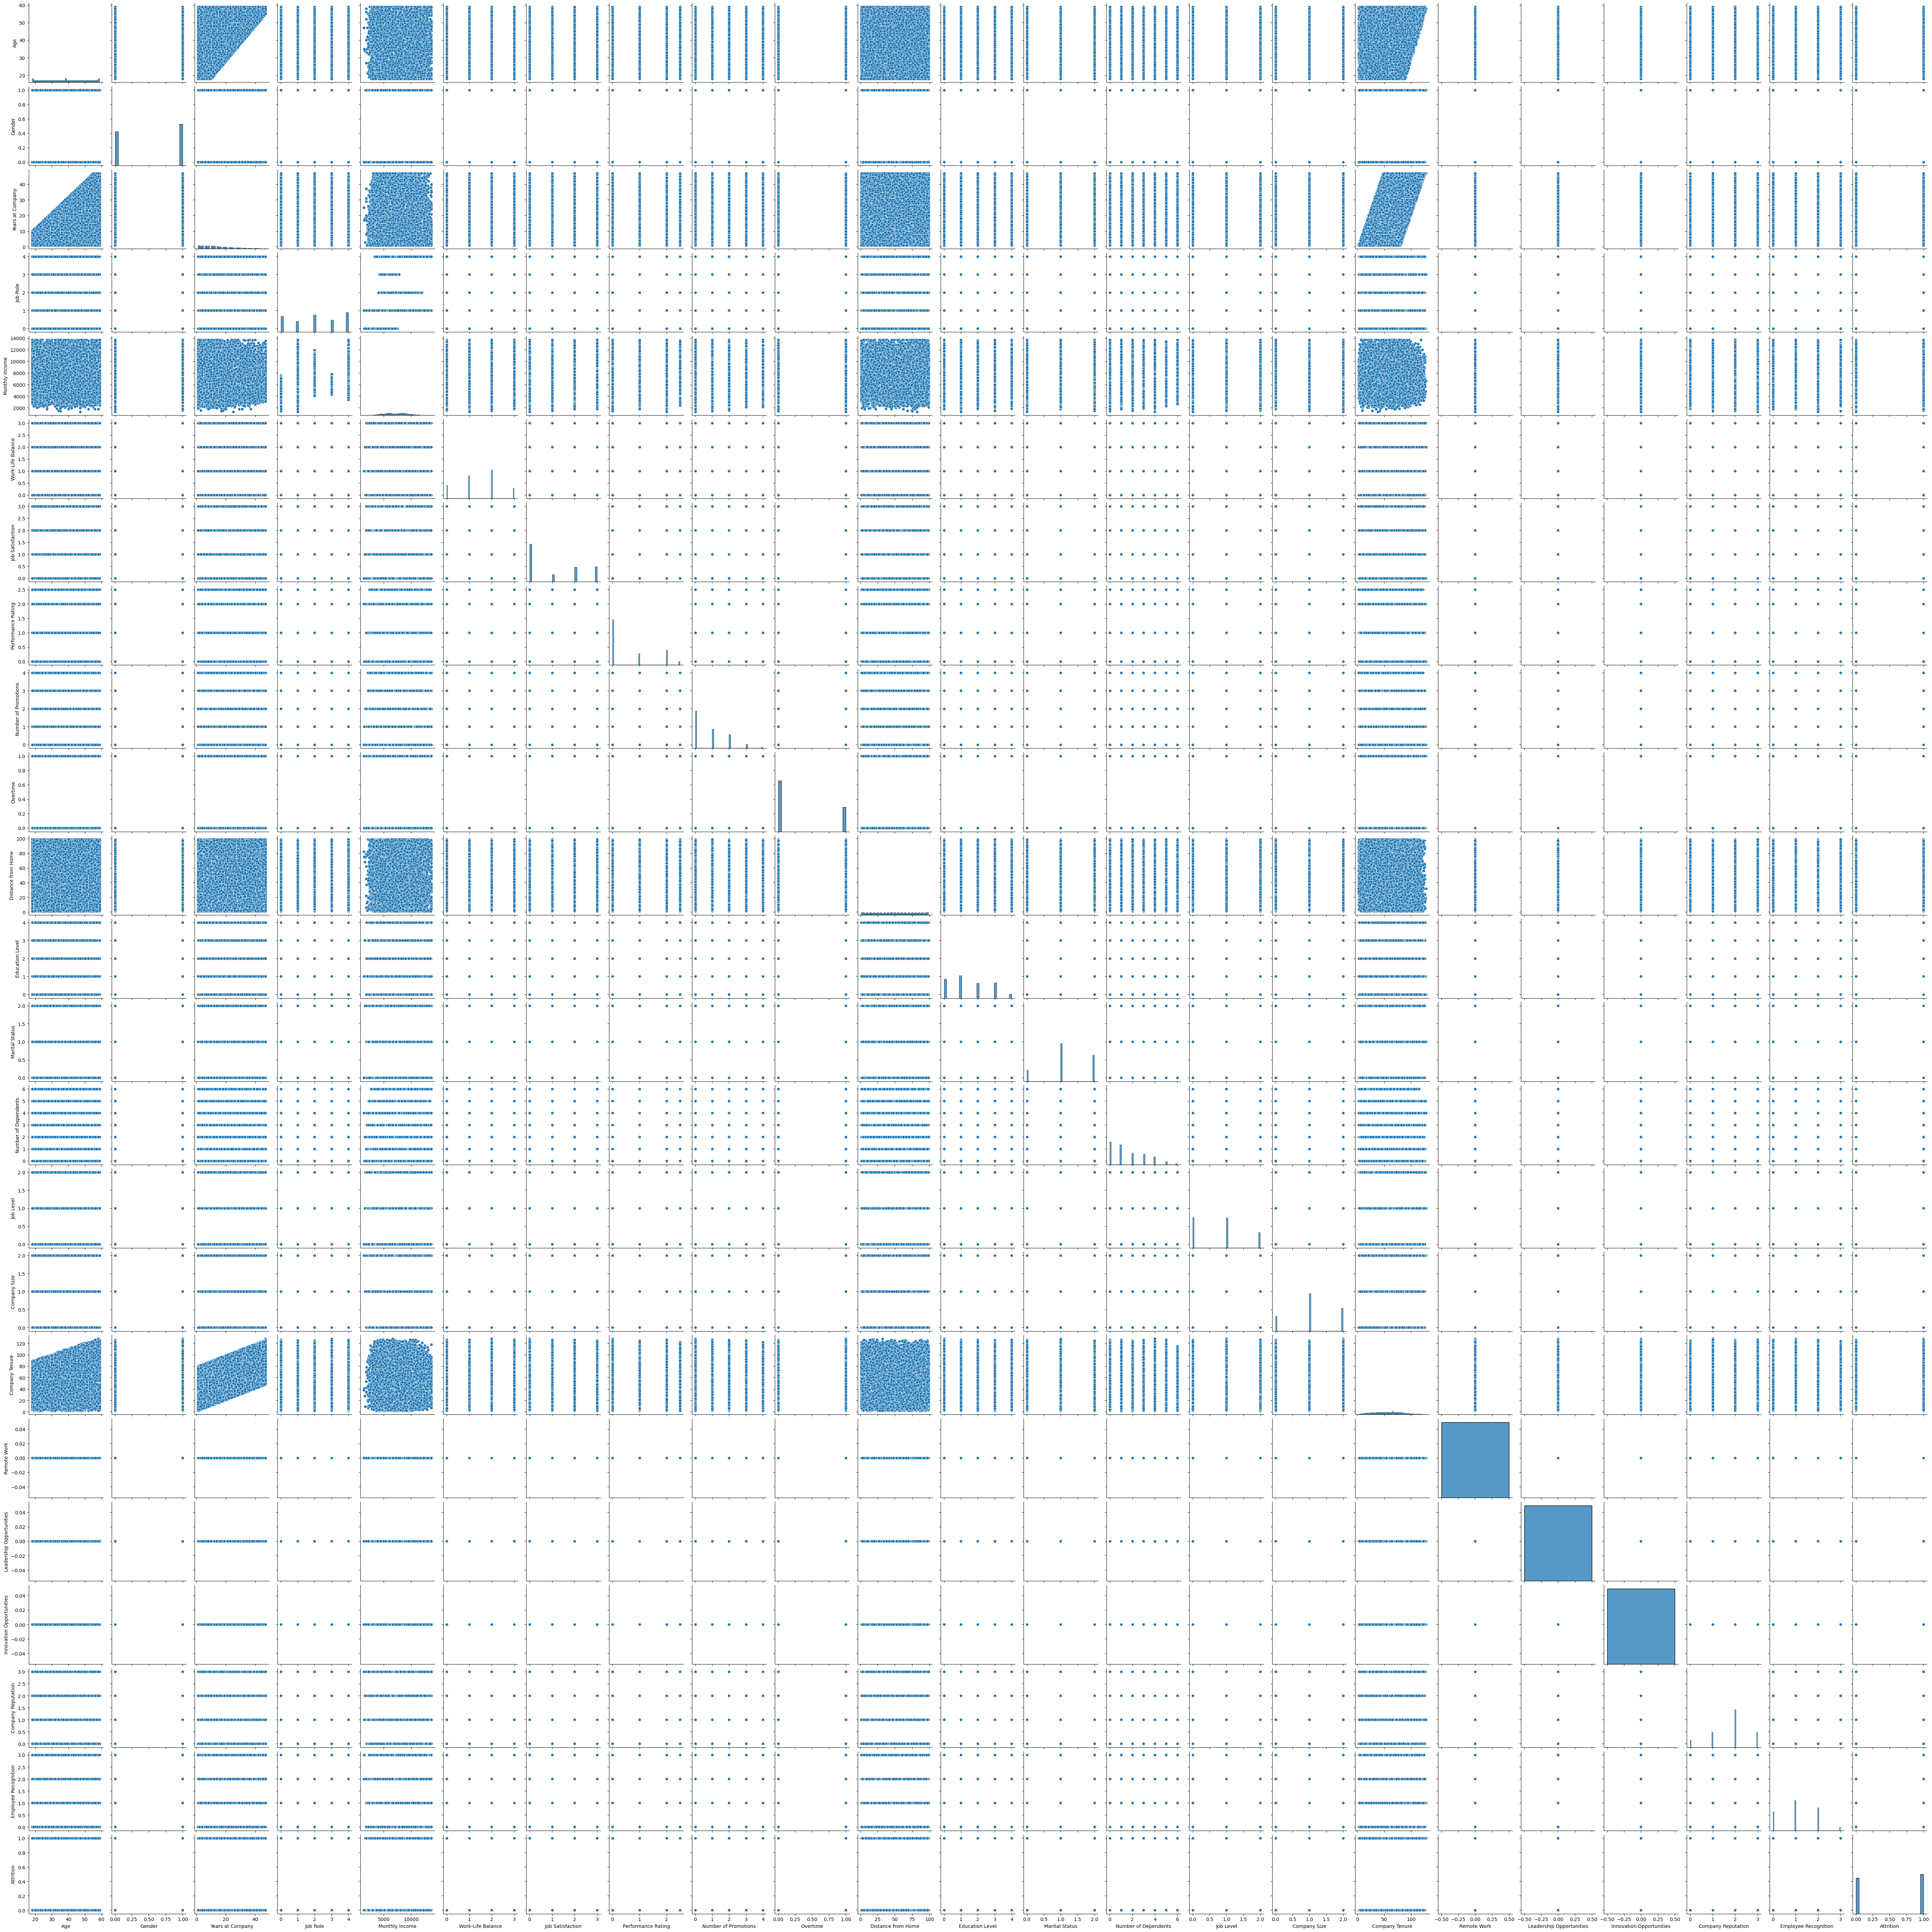

In [17]:
sns.pairplot(data)
plt.savefig(r"C:\Users\KIIT\Desktop\Research Paper\1. Required Documents for Submission\p1.png")
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       59598 non-null  float64
 1   Gender                    59598 non-null  float64
 2   Years at Company          59598 non-null  int64  
 3   Job Role                  59598 non-null  float64
 4   Monthly Income            59598 non-null  int64  
 5   Work-Life Balance         59598 non-null  float64
 6   Job Satisfaction          59598 non-null  int32  
 7   Performance Rating        59598 non-null  float64
 8   Number of Promotions      59598 non-null  int64  
 9   Overtime                  59598 non-null  float64
 10  Distance from Home        59598 non-null  int64  
 11  Education Level           59598 non-null  float64
 12  Marital Status            59598 non-null  float64
 13  Number of Dependents      59598 non-null  float64
 14  Job Le

In [19]:
data

Age  Gender  Years at Company  Job Role  Monthly Income  \
0      31.0     1.0                19       0.0            5390   
1      59.0     0.0                 4       3.0            5534   
2      24.0     0.0                10       2.0            8159   
3      36.0     0.0                 7       0.0            3989   
4      56.0     1.0                41       0.0            4821   
...     ...     ...               ...       ...             ...   
59593  50.0     0.0                12       0.0            4414   
59594  18.0     1.0                 4       2.0            8040   
59595  22.0     0.0                14       4.0            7944   
59596  23.0     1.0                 8       0.0            2931   
59597  56.0     1.0                19       4.0            6660   

       Work-Life Balance  Job Satisfaction  Performance Rating  \
0                    0.0                 2                 0.0   
1                    3.0                 0                 2.5   
2                    2.0                 0                 2.5   
3                    2.0                 0                 2.0   
4                    1.0                 3                 0.0   
...                  ...               ...                 ...   
59593                1.0                 0                 0.0   
59594                1.0                 0                 2.0   
59595                1.0                 0                 2.0   
59596                1.0                 3                 0.0   
59597                2.0                 0                 0.0   

       Number of Promotions  Overtime  ...  Number of Dependents  Job Level  \
0                         2       0.0  ...                   0.0        1.0   
1                         3       0.0  ...                   3.0        1.0   
2                         0       0.0  ...                   3.0        1.0   
3                         1       0.0  ...                   2.0        1.0   
4                         0       1.0  ...                   0.0        2.0   
...                     ...       ...  ...                   ...        ...   
59593                     1       1.0  ...                   2.0        2.0   
59594                     3       0.0  ...                   0.0        2.0   
59595                     0       1.0  ...                   2.0        0.0   
59596                     0       0.0  ...                   0.0        0.0   
59597                     0       1.0  ...                   3.0        1.0   

       Company Size  Company Tenure  Remote Work  Leadership Opportunities  \
0               1.0              89            0                         0   
1               1.0              21            0                         0   
2               1.0              74            0                         0   
3               2.0              50            0                         0   
4               1.0              68            0                         0   
...             ...             ...          ...                       ...   
59593           2.0              35            0                         0   
59594           1.0              73            0                         0   
59595           2.0              29            0                         0   
59596           0.0               9            0                         0   
59597           1.0              81            0                         0   

       Innovation Opportunities  Company Reputation  Employee Recognition  \
0                             0                 0.0                   2.0   
1                             0                 1.0                   1.0   
2                             0                 3.0                   1.0   
3                             0                 2.0                   2.0   
4                             0                 1.0                   2.0   
...                         ...                 ...           

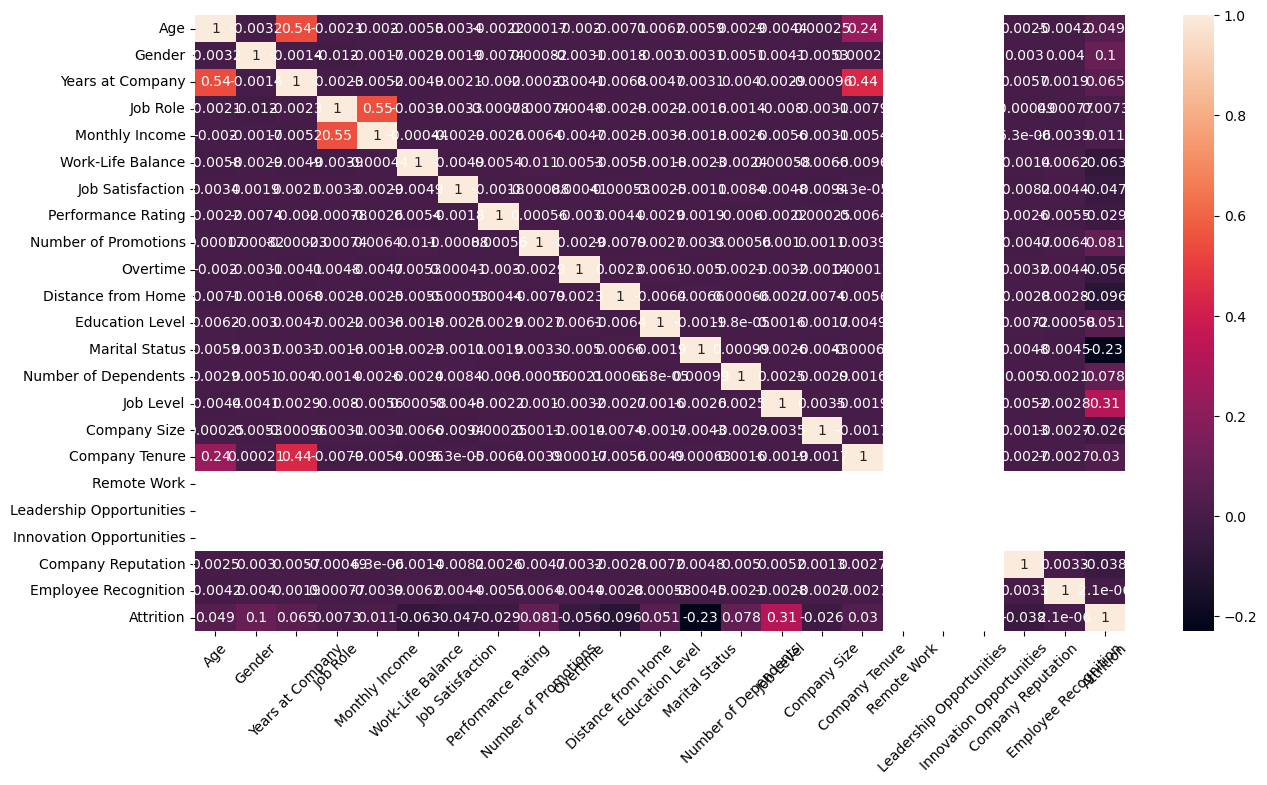

In [20]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,8])
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\KIIT\Desktop\Research Paper\1. Required Documents for Submission\h1.png")
plt.show()

In [21]:
print(data.columns)
if "Date" in data.columns:
    x=data.iloc[:,:-1].drop(columns=["Date"])
if "Cumulative Saving" in data.columns:
    x=data.iloc[:,:-1].drop(columns=["Cumulative Saving"])
else:
    x=data.iloc[:,:-1]
    
y=data.iloc[:,-1]
data.reset_index(inplace=True)
data.head()

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


index   Age  Gender  Years at Company  Job Role  Monthly Income  \
0      0  31.0     1.0                19       0.0            5390   
1      1  59.0     0.0                 4       3.0            5534   
2      2  24.0     0.0                10       2.0            8159   
3      3  36.0     0.0                 7       0.0            3989   
4      4  56.0     1.0                41       0.0            4821   

   Work-Life Balance  Job Satisfaction  Performance Rating  \
0                0.0                 2                 0.0   
1                3.0                 0                 2.5   
2                2.0                 0                 2.5   
3                2.0                 0                 2.0   
4                1.0                 3                 0.0   

   Number of Promotions  ...  Number of Dependents  Job Level  Company Size  \
0                     2  ...                   0.0        1.0           1.0   
1                     3  ...                   3.0        1.0           1.0   
2                     0  ...                   3.0        1.0           1.0   
3                     1  ...                   2.0        1.0           2.0   
4                     0  ...                   0.0        2.0           1.0   

   Company Tenure  Remote Work  Leadership Opportunities  \
0              89            0                         0   
1              21            0                         0   
2              74            0                         0   
3              50            0                         0   
4              68            0                         0   

   Innovation Opportunities  Company Reputation  Employee Recognition  \
0                         0                 0.0                   2.0   
1                         0                 1.0                   1.0   
2                         0                 3.0                   1.0   
3                         0                 2.0                   2.0   
4                         0                 1.0                   2.0   

   Attrition  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  

[5 rows x 24 columns]

In [22]:
len(x)

59598

In [23]:
len(y)

59598

In [24]:
len(data)

59598

In [25]:
x

Age  Gender  Years at Company  Job Role  Monthly Income  \
0      31.0     1.0                19       0.0            5390   
1      59.0     0.0                 4       3.0            5534   
2      24.0     0.0                10       2.0            8159   
3      36.0     0.0                 7       0.0            3989   
4      56.0     1.0                41       0.0            4821   
...     ...     ...               ...       ...             ...   
59593  50.0     0.0                12       0.0            4414   
59594  18.0     1.0                 4       2.0            8040   
59595  22.0     0.0                14       4.0            7944   
59596  23.0     1.0                 8       0.0            2931   
59597  56.0     1.0                19       4.0            6660   

       Work-Life Balance  Job Satisfaction  Performance Rating  \
0                    0.0                 2                 0.0   
1                    3.0                 0                 2.5   
2                    2.0                 0                 2.5   
3                    2.0                 0                 2.0   
4                    1.0                 3                 0.0   
...                  ...               ...                 ...   
59593                1.0                 0                 0.0   
59594                1.0                 0                 2.0   
59595                1.0                 0                 2.0   
59596                1.0                 3                 0.0   
59597                2.0                 0                 0.0   

       Number of Promotions  Overtime  ...  Marital Status  \
0                         2       0.0  ...             1.0   
1                         3       0.0  ...             0.0   
2                         0       0.0  ...             1.0   
3                         1       0.0  ...             2.0   
4                         0       1.0  ...             0.0   
...                     ...       ...  ...             ...   
59593                     1       1.0  ...             2.0   
59594                     3       0.0  ...             2.0   
59595                     0       1.0  ...             1.0   
59596                     0       0.0  ...             2.0   
59597                     0       1.0  ...             1.0   

       Number of Dependents  Job Level  Company Size  Company Tenure  \
0                       0.0        1.0           1.0              89   
1                       3.0        1.0           1.0              21   
2                       3.0        1.0           1.0              74   
3                       2.0        1.0           2.0              50   
4                       0.0        2.0           1.0              68   
...                     ...        ...           ...             ...   
59593                   2.0        2.0           2.0              35   
59594                   0.0        2.0           1.0              73   
59595                   2.0        0.0           2.0              29   
59596                   0.0        0.0           0.0               9   
59597                   3.0        1.0           1.0              81   

       Remote Work  Leadership Opportunities  Innovation Opportunities  \
0                0                         0                         0   
1                0                         0                         0   
2                0                         0                         0   
3                0                         0                         0   
4                0                         0                         0   
...            ...                       ...                       ...   
59593            0                         0                         0   
59594            0                         0                         0   
59595            0                         0                         0   
59596            0                         0                

In [26]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
59593    0.0
59594    0.0
59595    1.0
59596    0.0
59597    1.0
Name: Attrition, Length: 59598, dtype: float64

# Model Building

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Logistic Regression : LogisticRegression()
Training score :  0.6889112613260463
Testing score :  0.6827181208053691
Mean absolute error :  0.31728187919463086
Mean squared error :  0.31728187919463086
Root mean squared error :  0.5632777993092137
R2 score :  -0.272265630644299


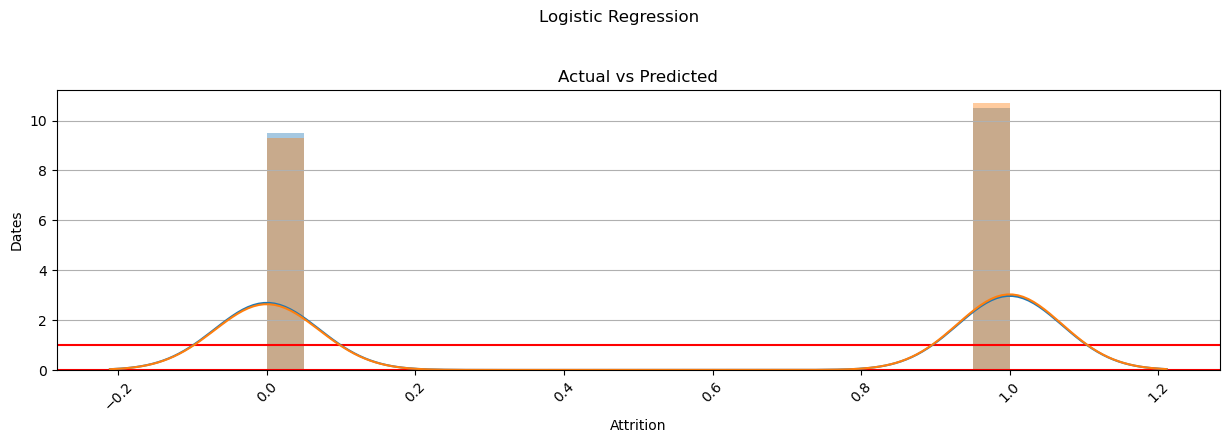

SVM Classification : SVC()


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,accuracy_score
import numpy as np
plot_step_size=15000
ytick_step_size=7500
c=str()
if "Date" in data.columns:
    c="Date"
else:
    c=data.columns[0]
if Reg_model_flag=="regression":    
    for regression_model_name,regression_model_reference in model_regression.items():
        print(regression_model_name,end=" : ")
        print(regression_model_reference)

        regression_model_reference.fit(x_train,y_train)
        y_pred=regression_model_reference.predict(x_test)
        #print("Linear Regression (predicted values) : ",y_pred)
        print("Training score : ",regression_model_reference.score(x_train,y_train))
        print("Testing score : ",regression_model_reference.score(x_test,y_test))
        print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
        print("Mean squared error : ",mean_squared_error(y_test,y_pred))
        print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
        print("R2 score : ",r2_score(y_test,y_pred))

        #plt.scatter(x_test,y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_pred)

        plt.figure(figsize=[15,8])
        plt.suptitle(f"{regression_model_name}")
        plt.subplot(2,1,1)
        plt.title("Actual vs Predicted - Salaries")
        plt.xlabel(c)
        plt.ylabel("Predicted Salary")
        plt.xticks(rotation=45)
        plt.grid(axis="y")        
        plt.axhline(min(y_test),color="red")
        plt.axhline(max(y_test),color="red")
        plt.ylim([min(y_test)-plot_step_size,max(y_test)+plot_step_size])
        plt.plot(data[c].iloc[len(data)-len(y_test):],y_test,label="Actual data")
        plt.scatter(data[c].iloc[len(data)-len(y_test):],y_test)
        plt.scatter(data[c].iloc[len(data)-len(y_test):],y_pred)
        plt.plot(data[c].iloc[len(data)-len(y_test):],y_pred,label="Predicted data")
        plt.legend()
        #plt.show()

        #plt.figure(figsize=[15,5])
        plt.subplot(2,1,2)
        plt.xticks(rotation=45)
        plt.axhline(max(y_test-y_pred),color="green")
        plt.axhline(0,color="red")
        plt.axhline(min(y_test-y_pred),color="green")
        plt.ylim(min(y_test-y_pred)-plot_step_size,max(y_test-y_pred)+plot_step_size)
        y_min, y_max = min(y_test-y_pred) - plot_step_size, max(y_test-y_pred) + plot_step_size
        plt.yticks(np.arange(y_min, y_max, ytick_step_size))  # Set stepping for y-axis
        plt.title(f"Residuals")
        plt.ylabel("Residuals")
        plt.xlabel("Date")
        plt.grid(axis='x')
        plt.grid(axis='y')        
        plt.plot(data[c].iloc[len(data)-len(y_test):],y_test-y_pred,'-')
        plt.tight_layout()
        plt.savefig(r"C:\Users\KIIT\Desktop\Research Paper\1. Required Documents for Submission\{regression_model_reference}.png".format(regression_model_reference=regression_model_reference))
        plt.show() 
elif Reg_model_flag=="classification":
    # Inprogress
    for regression_model_name,regression_model_reference in model_Classify.items():
        print(regression_model_name,end=" : ")
        print(regression_model_reference)

        regression_model_reference.fit(x_train,y_train)
        y_pred=regression_model_reference.predict(x_test)
        #print("Linear Regression (predicted values) : ",y_pred)
        print("Training score : ",regression_model_reference.score(x_train,y_train))
        print("Testing score : ",regression_model_reference.score(x_test,y_test))
        print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
        print("Mean squared error : ",mean_squared_error(y_test,y_pred))
        print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
        print("R2 score : ",r2_score(y_test,y_pred))

        #plt.scatter(x_test,y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_test)
        #plt.plot(range(len(pd.DataFrame(x_test).iloc[:,1])),y_pred)

        plt.figure(figsize=[15,8])
        plt.suptitle(f"{regression_model_name}")
        plt.subplot(2,1,1)
        plt.title("Actual vs Predicted")
        plt.ylabel("Dates")
        plt.xlabel("Predicted")
        plt.xticks(rotation=45)
        plt.grid(axis="y")        
        plt.axhline(min(y_test),color="red")
        plt.axhline(max(y_test),color="red")
        #plt.ylim([min(y_test)-plot_step_size,max(y_test)+plot_step_size])
        sns.distplot(y_test,bins=20,hist=True, kde=True)
        sns.distplot(y_pred,bins=20,hist=True, kde=True)
        #sns.distplot(data[c],y_test)
        #sns.distplot(data[c],y_pred)
        #plt.plot(data[c].iloc[len(data)-len(y_test):],y_test)
        #plt.scatter(data[c].iloc[len(data)-len(y_test):],y_test)
        #plt.scatter(data[c].iloc[len(data)-len(y_test):],y_pred)
        #plt.plot(data[c].iloc[len(data)-len(y_test):],y_pred)
        plt.savefig(r"C:\Users\KIIT\Desktop\Research Paper\1. Required Documents for Submission\{regression_model_reference}.png".format(regression_model_reference=regression_model_reference))
        plt.show()
else:
    pass



Evaluating Linear Regression...


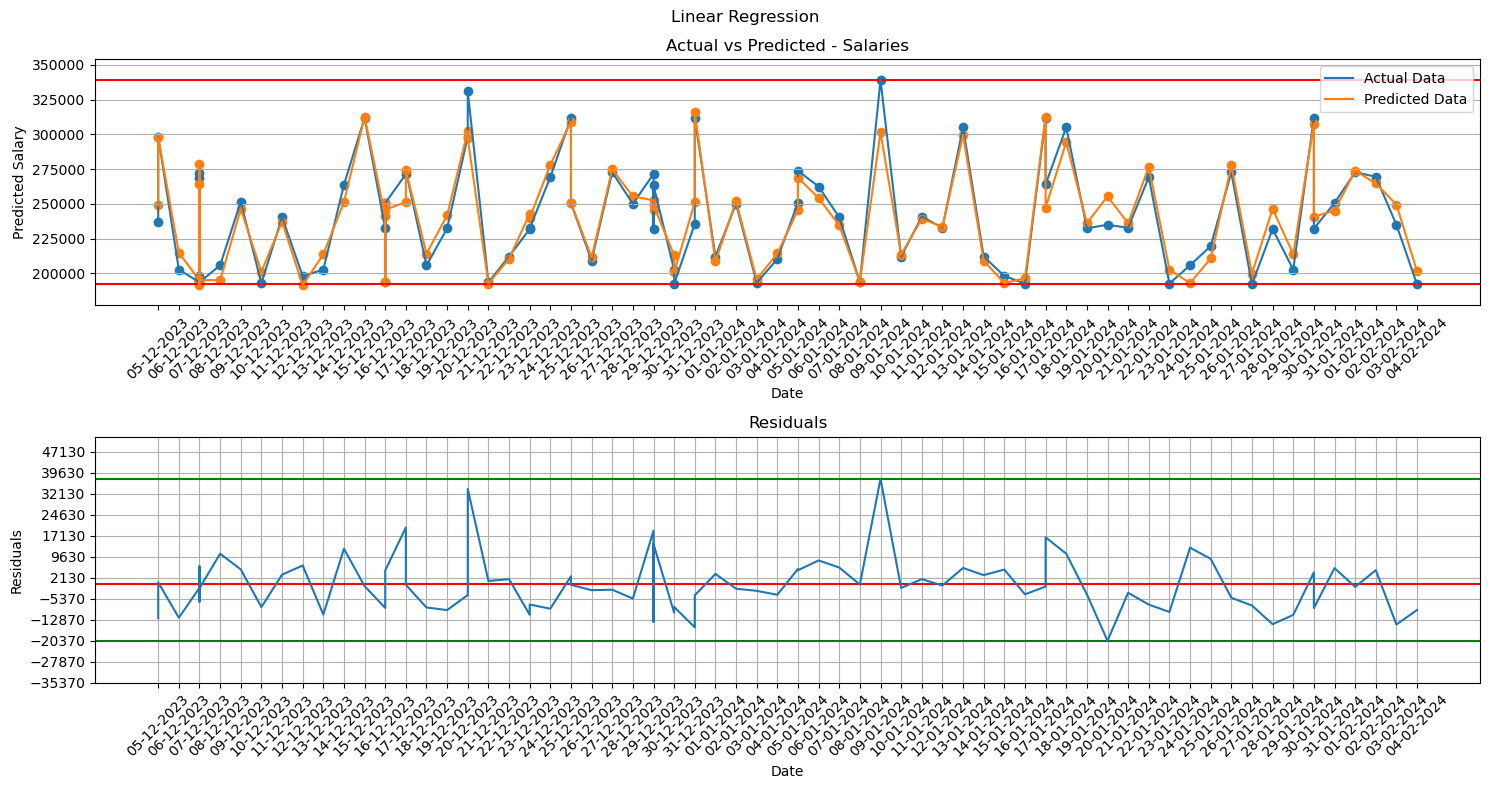


Evaluating SVM Regression...


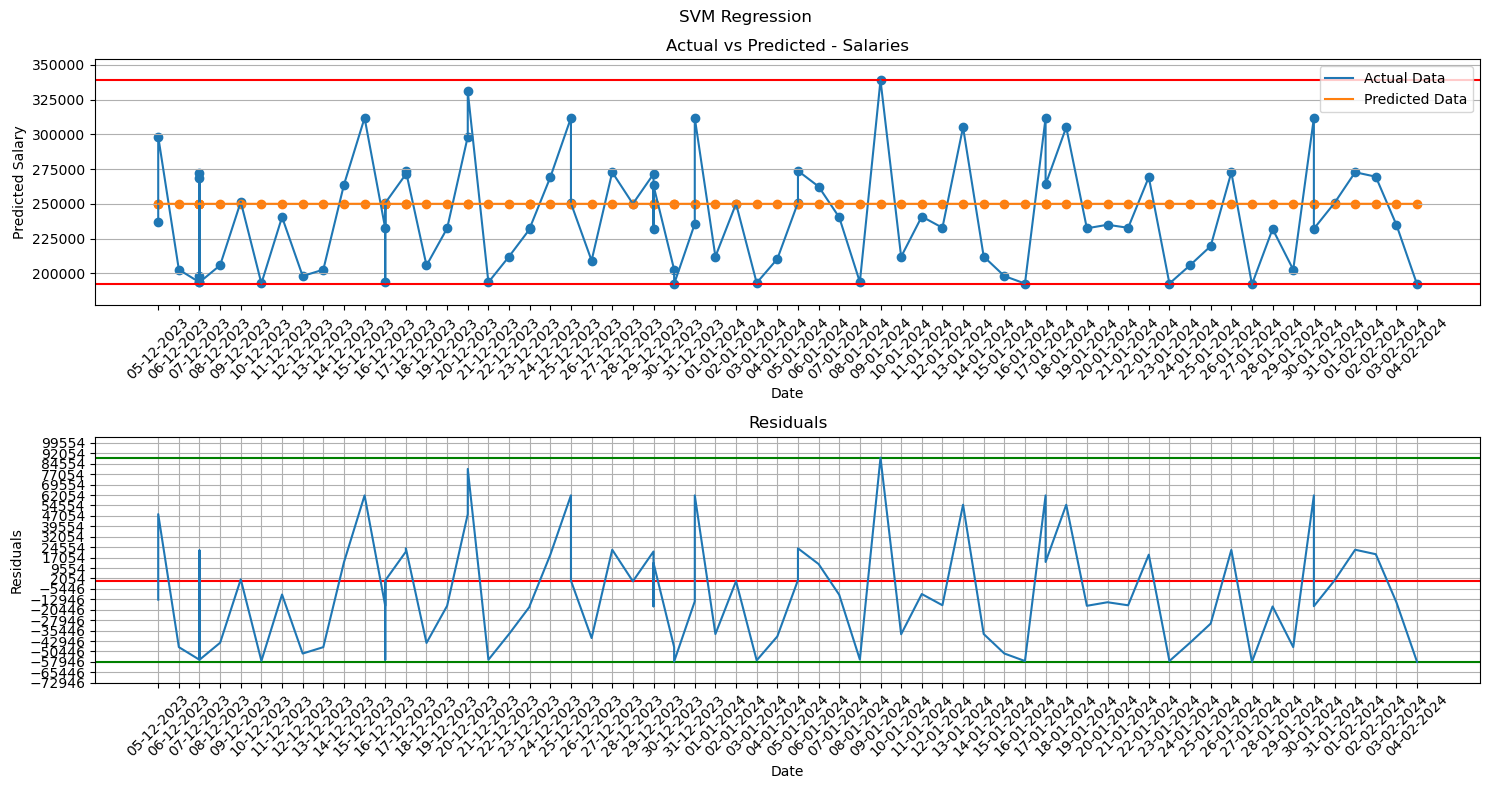


Evaluating DecisionTree Regression...


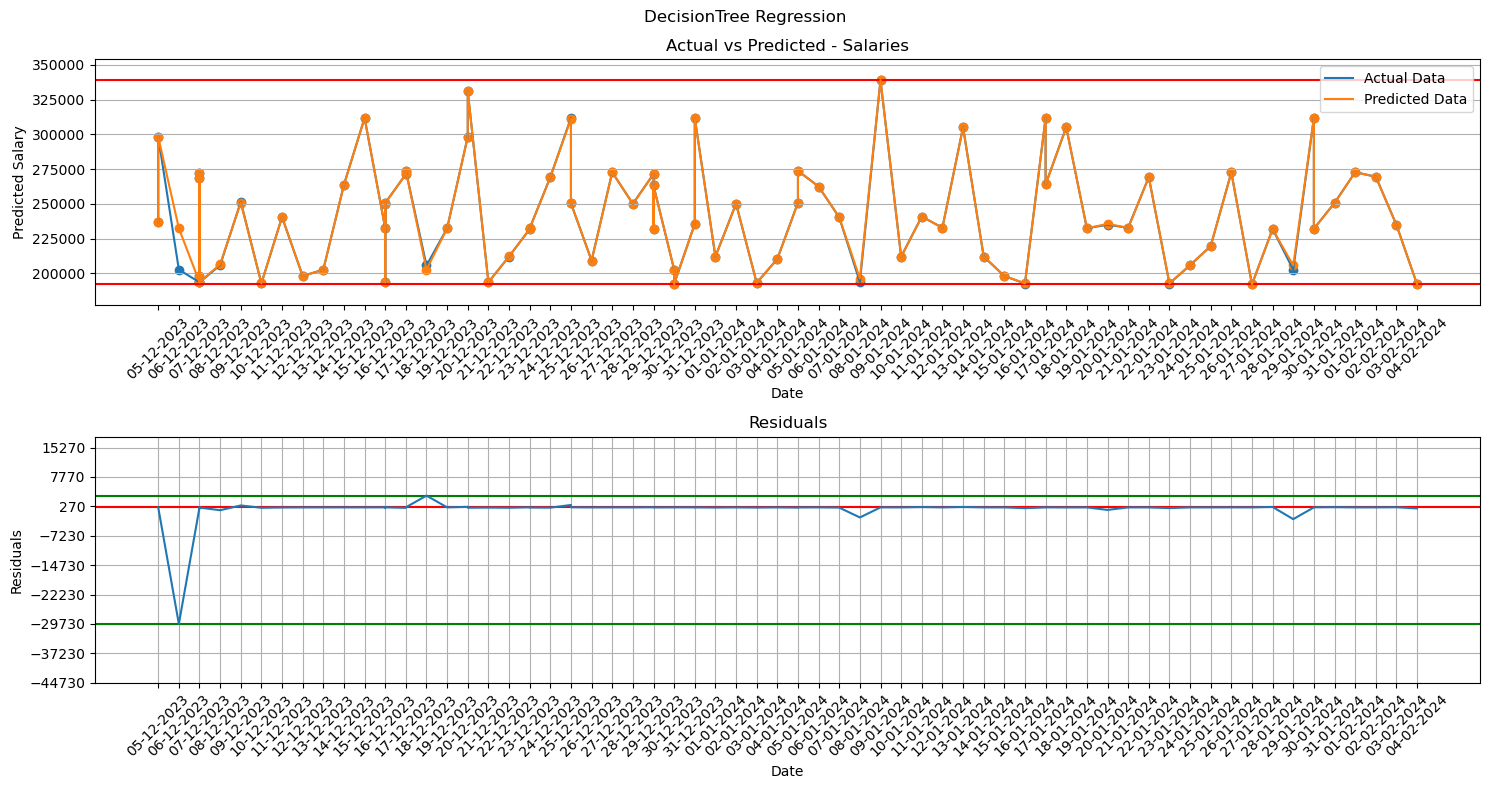


Evaluating Randomforest Regression...


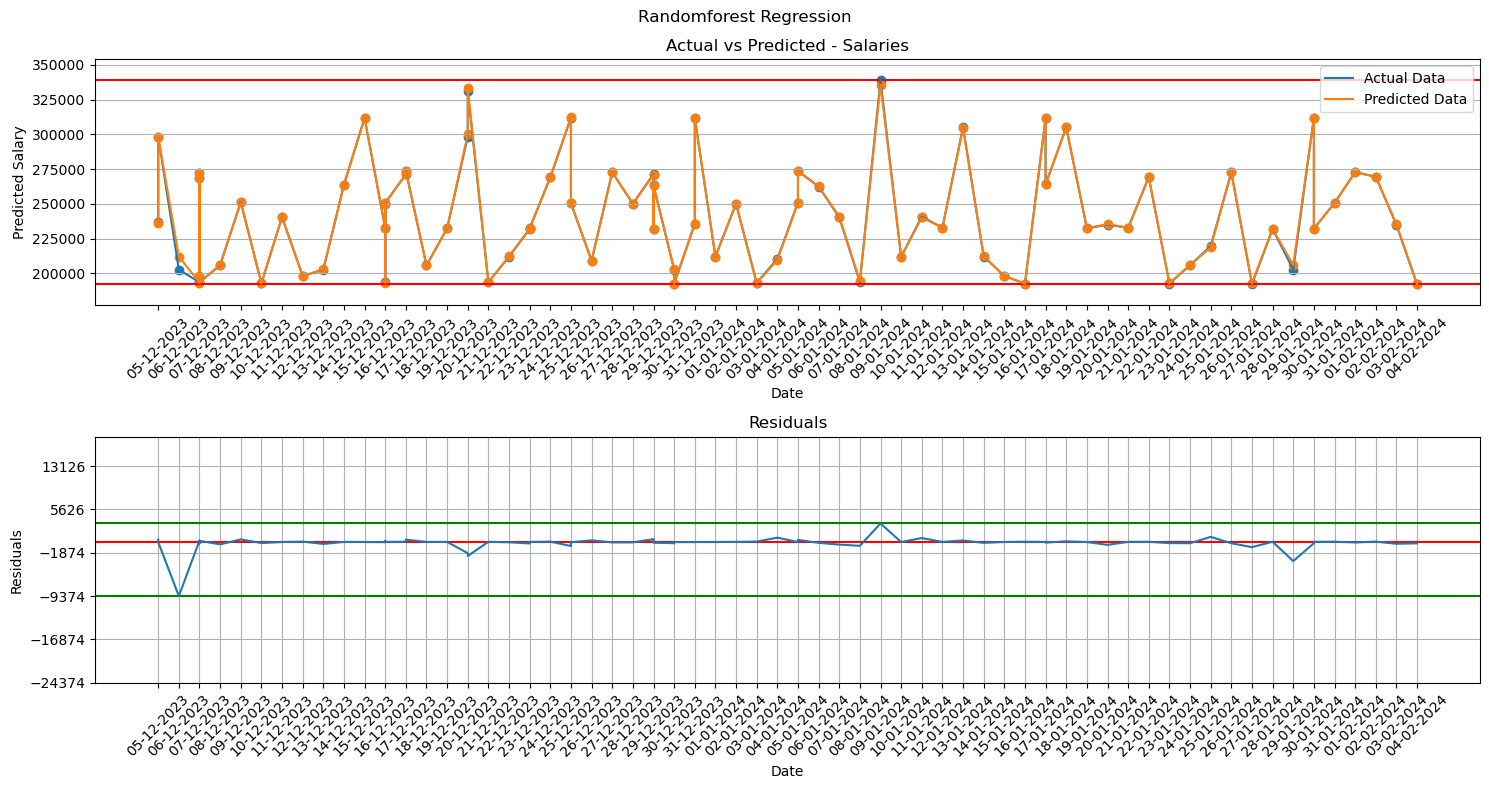


Model Performance Summary:
                         Train Score  Test Score           MAE           MSE  \
Linear Regression           0.939826    0.933428   7386.558200  9.930132e+07   
SVM Regression              0.000244   -0.048190  33182.097995  1.563523e+09   
DecisionTree Regression     1.000000    0.992465    536.677160  1.123947e+07   
Randomforest Regression     0.998081    0.998967    418.390232  1.541573e+06   

                                 RMSE  R2 Score  
Linear Regression         9965.004779  0.933428  
SVM Regression           39541.406480 -0.048190  
DecisionTree Regression   3352.531189  0.992465  
Randomforest Regression   1241.601121  0.998967  

Best Model: RandomForestRegressor()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, 
    accuracy_score, f1_score
)

# Set plot step sizes
plot_step_size = 15000
ytick_step_size = 7500

# Identify Date column or fallback
c = "Date" if "Date" in data.columns else data.columns[0]

# Store evaluation results
model_performance = {}

if Reg_model_flag == "regression":    
    best_model = None
    best_r2_score = float('-inf')  # Initialize with the lowest possible R² score

    for model_name, model in model_regression.items():
        print(f"\nEvaluating {model_name}...")

        # Train model
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Compute metrics
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store results
        model_performance[model_name] = {
            "Train Score": train_score,
            "Test Score": test_score,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R2 Score": r2
        }

        # Select best model based on highest R² score
        if r2 > best_r2_score:
            best_r2_score = r2
            best_model = model

        # Plot Actual vs Predicted
        plt.figure(figsize=[15, 8])
        plt.suptitle(f"{model_name}")

        # Subplot 1: Actual vs Predicted
        plt.subplot(2, 1, 1)
        plt.title("Actual vs Predicted - Salaries")
        plt.xlabel(c)
        plt.ylabel("Predicted Salary")
        plt.xticks(rotation=45)
        plt.grid(axis="y")        
        plt.axhline(min(y_test), color="red")
        plt.axhline(max(y_test), color="red")
        plt.ylim([min(y_test)-plot_step_size, max(y_test)+plot_step_size])
        plt.plot(data[c].iloc[len(data)-len(y_test):], y_test, label="Actual Data")
        plt.scatter(data[c].iloc[len(data)-len(y_test):], y_test)
        plt.scatter(data[c].iloc[len(data)-len(y_test):], y_pred)
        plt.plot(data[c].iloc[len(data)-len(y_test):], y_pred, label="Predicted Data")
        plt.legend()

        # Subplot 2: Residuals
        plt.subplot(2, 1, 2)
        plt.xticks(rotation=45)
        plt.axhline(max(y_test - y_pred), color="green")
        plt.axhline(0, color="red")
        plt.axhline(min(y_test - y_pred), color="green")
        plt.ylim(min(y_test - y_pred) - plot_step_size, max(y_test - y_pred) + plot_step_size)
        plt.yticks(np.arange(min(y_test - y_pred) - plot_step_size, max(y_test - y_pred) + plot_step_size, ytick_step_size))
        plt.title("Residuals")
        plt.ylabel("Residuals")
        plt.xlabel(c)
        plt.grid(True)
        plt.plot(data[c].iloc[len(data)-len(y_test):], y_test - y_pred, '-')

        # Save plot
        plt.tight_layout()
        plt.savefig(rf"C:\Users\KIIT\Desktop\Research Paper\1. Required Documents for Submission\{model_name}.png")
        plt.show()

elif Reg_model_flag == "classification":
    best_model = None
    best_accuracy = float('-inf')  # Initialize with lowest accuracy

    for model_name, model in model_Classify.items():
        print(f"\nEvaluating {model_name}...")

        # Train model
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Compute metrics
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store results
        model_performance[model_name] = {
            "Train Score": train_score,
            "Test Score": test_score,
            "Accuracy": accuracy,
            "F1 Score": f1
        }

        # Select best model based on highest accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

        # Plot distribution of actual vs predicted values
        plt.figure(figsize=[15, 8])
        plt.suptitle(f"{model_name}")

        plt.subplot(2, 1, 1)
        plt.title("Actual vs Predicted")
        plt.xlabel("Predicted")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.grid(axis="y")

        # Plot distributions
        sns.histplot(y_test, bins=20, kde=True, label="Actual", color="blue")
        sns.histplot(y_pred, bins=20, kde=True, label="Predicted", color="orange")
        plt.legend()

        # Save plot
        plt.savefig(rf"C:\Users\KIIT\Desktop\Research Paper\1. Required Documents for Submission\{model_name}.png")
        plt.show()

# Convert results to DataFrame and save
performance_df = pd.DataFrame.from_dict(model_performance, orient="index")
performance_df.to_csv(r"C:\Users\KIIT\Desktop\Research Paper\model_performance.csv")

# Print summary
print("\nModel Performance Summary:")
print(performance_df)

# Return best model
print(f"\nBest Model: {best_model}")


In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report

class AutoMLApp:
    def __init__(self, root):
        self.root = root
        self.root.title("AutoML GUI")
        self.root.geometry("800x600")
        
        self.label = tk.Label(root, text="Upload CSV or Excel File:")
        self.label.pack()
        
        self.upload_button = tk.Button(root, text="Upload File", command=self.upload_file)
        self.upload_button.pack()
        
        self.process_button = tk.Button(root, text="Process & Train Models", command=self.process_data, state=tk.DISABLED)
        self.process_button.pack()
        
        self.result_text = tk.Text(root, height=40, width=80)
        self.result_text.pack()
        
        self.file_path = None
        self.df = None
    
    def upload_file(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv"), ("Excel files", "*.xlsx")])
        if file_path:
            self.file_path = file_path
            if file_path.endswith(".xlsx"):
                self.df = pd.read_excel(file_path)
            else:
                self.df = pd.read_csv(file_path)
            messagebox.showinfo("Success", "File Uploaded Successfully!")
            self.process_button.config(state=tk.NORMAL)
    
    def process_data(self):
        if self.df is None:
            messagebox.showerror("Error", "No file uploaded.")
            return
        
        self.result_text.delete(1.0, tk.END)
        
        target_column = self.df.columns[-1]  # Assume last column is target
        X = self.df.drop(columns=[target_column])
        y = self.df[target_column]
        
        # Handle categorical features
        for col in X.select_dtypes(include=['object']).columns:
            X[col] = LabelEncoder().fit_transform(X[col])
        
        # Determine problem type
        if y.nunique() > 10:  # Regression assumption
            problem_type = "Regression"
        else:
            problem_type = "Classification"
            y = LabelEncoder().fit_transform(y)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        models = {
            "Regression": {
                "LinearRegression": LinearRegression(),
                "SVR": SVR(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "RandomForestRegressor": RandomForestRegressor()
            },
            "Classification": {
                "LogisticRegression": LogisticRegression(),
                "SVC": SVC(),
                "DecisionTreeClassifier": DecisionTreeClassifier(),
                "RandomForestClassifier": RandomForestClassifier()
            }
        }
        
        best_model = None
        best_score = float("-inf")
        results = ""
        
        for name, model in models[problem_type].items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            if problem_type == "Regression":
                score = r2_score(y_test, y_pred)
                results += f"{name}: R²={score:.4f}, MAE={mean_absolute_error(y_test, y_pred):.4f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n"
            else:
                score = accuracy_score(y_test, y_pred)
                results += f"{name}: Accuracy={score:.4f}\n"
                results += classification_report(y_test, y_pred) + "\n"
            
            if score > best_score:
                best_score = score
                best_model = name
        
        self.result_text.insert(tk.END, results + f"\nBest Model: {best_model}")
        s='-'*150
        messagebox.showinfo("\nTraining Complete", f"Best model: {best_model}")

if __name__ == "__main__":
    root = tk.Tk()
    app = AutoMLApp(root)
    root.mainloop()
